# Credit Card Fraud Detection::
Download dataset from this link:

https://www.kaggle.com/mlg-ulb/creditcardfraud

### Description about dataset::
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning.

#### Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.
# WORKFLOW :
1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Standardized the Input Variables.

4.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

5.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

6.Compilation Step (Note : Its a Binary problem , select loss , metrics according to it)

7.Train the Model with Epochs (100).

8.If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .

9.Prediction should be > 92% 10.Evaluation Step 11Prediction

### Task::
Identify fraudulent credit card transactions.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("creditcard.csv")

In [3]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


### Check Missing Values

In [4]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
info=data.iloc[:,:30]
label=data.iloc[:,-1]

In [7]:
import sklearn
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(info,label,test_size=.30,random_state=1)

In [8]:
mean = X_train.mean(axis=0)
X_train -= mean
std = X_train.std(axis=0)
X_train /= std
X_test -= mean
X_test /= std

In [9]:
X_train= np.asarray(X_train).astype('float32')
X_test= np.asarray(X_test).astype('float32')

In [10]:
val_x=X_train[:10000]
partial_x_train=X_train[10000:]
val_y=y_train[:10000]
partial_y_train=y_train[10000:]

In [23]:
val_x=X_train[:15000]
partial_x_train=X_train[15000:]
val_y=y_train[:15000]
partial_y_train=y_train[15000:]

In [35]:
from keras import models, layers , optimizers
model=models.Sequential()
model.add(layers.Dense(6,activation="tanh",input_shape=(X_train.shape[1],)))
model.add(layers.Dense(4,activation="tanh"))
model.add(layers.Dense(1,activation="sigmoid"))

In [36]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 6)                 186       
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 28        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 5         
Total params: 219
Trainable params: 219
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.compile(optimizer="adam", loss="binary_crossentropy",metrics=['accuracy'])

In [38]:
network = model.fit(partial_x_train, partial_y_train,epochs=5, batch_size=20, verbose=1,validation_data=(val_x,val_y))

Epoch 1/5
9219/9219 [==============================] - 14s 1ms/step - loss: 0.0960 - accuracy: 0.9629 - val_loss: 0.0026 - val_accuracy: 0.9993
Epoch 2/5
9219/9219 [==============================] - 14s 1ms/step - loss: 0.0033 - accuracy: 0.9994 - val_loss: 0.0023 - val_accuracy: 0.9993
Epoch 3/5
9219/9219 [==============================] - 14s 1ms/step - loss: 0.0031 - accuracy: 0.9994 - val_loss: 0.0027 - val_accuracy: 0.9993
Epoch 4/5
9219/9219 [==============================] - 13s 1ms/step - loss: 0.0033 - accuracy: 0.9993 - val_loss: 0.0025 - val_accuracy: 0.9995
Epoch 5/5
9219/9219 [==============================] - 13s 1ms/step - loss: 0.0031 - accuracy: 0.9994 - val_loss: 0.0021 - val_accuracy: 0.9995


In [39]:
history_dict=network.history
history_dict.keys()
[u"loss",u"accuracy",u"val_loss",u"val_accuracy"]

['loss', 'accuracy', 'val_loss', 'val_accuracy']

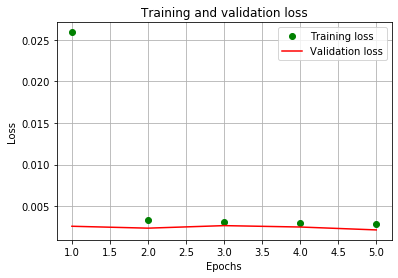

In [40]:
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss,"go",label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

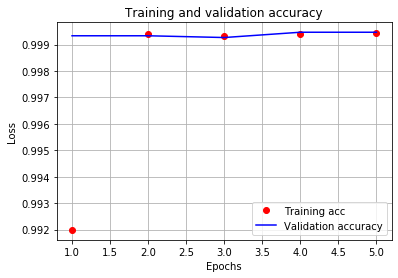

In [41]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, acc_values, 'ro', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.show()

In [46]:
loss_1, accuracy = model.evaluate(X_test, y_test)

2671/2671 [==============================] - 6s 2ms/step - loss: 0.0032 - accuracy: 0.9994


In [47]:
print(f"loss on evaluation is :{loss_1}\naccuracy on evaluation is :{accuracy}")

loss on evaluation is :0.0031641835812479258
accuracy on evaluation is :0.9993680119514465


In [49]:
x_predict = model.predict(X_test)
x = x_predict//100

In [50]:
x = pd.DataFrame((x))
x

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
85438,0.0
85439,0.0
85440,0.0
85441,0.0
